In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/HP/Desktop/df_OP.csv", index_col="Unnamed: 0")

In [3]:
df['coni'].unique()

array([  6,   7,  13,   1,  12,   2,  16,   4,   3,   8,   5,  15,  47,
        11,  50,  54,  14,  23,  38,  22,  10,  30,  29,  36,  21,  34,
        46,  45,   9,  31,  17, 309,  49, 121,  80, 101,  83, 100, 104,
        98,  88,  18,  32,  57, 302, 120,  44,  26,  43,  35, 181,  40,
        84,  20,  75,  72,  25,  59,  37,  66,  41], dtype=int64)

In [4]:
df['cod.i14'].unique()

array([nan, '5E3-4825UV'], dtype=object)

In [5]:
df

,estrusore,statino,codice,n_cono,coni,kg_cono,TD,TE,color,valcrom,...,fp.i14,dex.i14,kg.i14,cod.i15,fp.i15,dex.i15,kg.i15,ordine,data,ID
1-6E1N2200105,E1,N2200105,5E0-3621,1,6,70.0,12.400000,155.555556,36,35,...,0,NaN,0.0,NaN,0,NaN,0.0,1,2022-01-25 12:16:28,1-6E1N2200105
2-6E1N2200105,E1,N2200105,5E0-3621,2,6,70.0,12.400000,155.555556,36,35,...,0,NaN,0.0,NaN,0,NaN,0.0,1,2022-01-25 12:16:28,2-6E1N2200105
3-6E1N2200105,E1,N2200105,5E0-3621,3,6,70.0,12.400000,155.555556,36,35,...,0,NaN,0.0,NaN,0,NaN,0.0,1,2022-01-25 12:16:28,3-6E1N2200105
4-6E1N2200105,E1,N2200105,5E0-3621,4,6,70.0,12.400000,155.555556,36,35,...,0,NaN,0.0,NaN,0,NaN,0.0,1,2022-01-25 12:16:28,4-6E1N2200105
5-6E1N2200105,E1,N2200105,5E0-3621,5,6,70.0,12.400000,155.555556,36,35,...,0,NaN,0.0,NaN,0,NaN,0.0,1,2022-01-25 12:16:28,5-6E1N2200105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46-50E9N2200403,E9,N2200403,5E9-4057UV,46,50,80.0,13.533333,192.000000,3,34,...,0,NaN,0.0,NaN,0,NaN,0.0,8,2022-03-07 18:48:36,46-50E9N2200403
47-50E9N2200403,E9,N2200403,5E9-4057UV,47,50,80.0,13.533333,192.000000,3,34,...,0,NaN,0.0,NaN,0,NaN,0.0,8,2022-03-07 18:48:36,47-50E9N2200403
48-50E9N2200403,E9,N2200403,5E9-4057UV,48,50,80.0,13.533333,192.000000,3,34,...,0,NaN,0.0,NaN,0,NaN,0.0,8,2022-03-07 18:48:36,48-50E9N2200403
49-50E9N2200403,E9,N2200403,5E9-4057UV,49,50,80.0,13.533333,192.000000,3,34,...,0,NaN,0.0,NaN,0,NaN,0.0,8,2022-03-07 18:48:36,49-50E9N2200403


In [6]:
cod_col = ['cod.i' + str(x) for x in range(1, 16)]
codici = []
for col in cod_col:
    codici.extend(df[col])

In [7]:
from collections import Counter
par_list = Counter(codici)
df_pareto = pd.DataFrame.from_dict(par_list, orient='index').reset_index()

In [8]:
df_pareto.dropna(inplace=True)

In [9]:
df_pareto.rename(columns = {'index':'codice', 0:'movimentazioni'}, inplace = True)

In [10]:
mask = np.asarray(df_pareto[ df_pareto['codice'].str[0] == '5'].index)
df_pareto.drop(mask, inplace=True)

In [11]:
df_pareto.sort_values(by='movimentazioni', ascending=False, inplace=True)

In [12]:
df_pareto['pareto'] = 100 *df_pareto.movimentazioni.cumsum() / df_pareto.movimentazioni.sum()

In [13]:
def plotting(df, pareto_column, y_titolo, plot_titolo):
    #Lista dei codici in percentuale ==  asse x del grafico
    codici = []

    for x in range( len( df ) ):
        codici.append( ( x / len(df) ) * 100 )
    
    df.sort_values(pareto_column, inplace = True)
    df.reset_index(inplace=True)
    df.drop('index', axis=1, inplace=True)

    plt.figure( figsize = ( 12, 6 ), dpi = 200 )
    plt.plot( codici, df[pareto_column], color='black')

    plt.xticks(np.arange(0, 100, 5))
    plt.yticks(np.arange(0, 100, 5))
    plt.axvspan(0, 14, alpha=0.3, color='red')
    plt.axvspan(14, 28, alpha=0.3, color='orange')
    plt.axvspan(28, 42, alpha=0.3, color='yellow')
    plt.axvspan(42, 56, alpha=0.3, color='green')
    plt.axvspan(56, 70, alpha=0.3, color='blue')
    plt.axvspan(70, 85, alpha=0.3, color='purple')
    plt.axvspan(85, 100, alpha=0.3, color='grey')

    plt.xlabel('Percentuale sul totale dei codici')
    plt.ylabel(y_titolo)
    plt.title(plot_titolo)
    return()

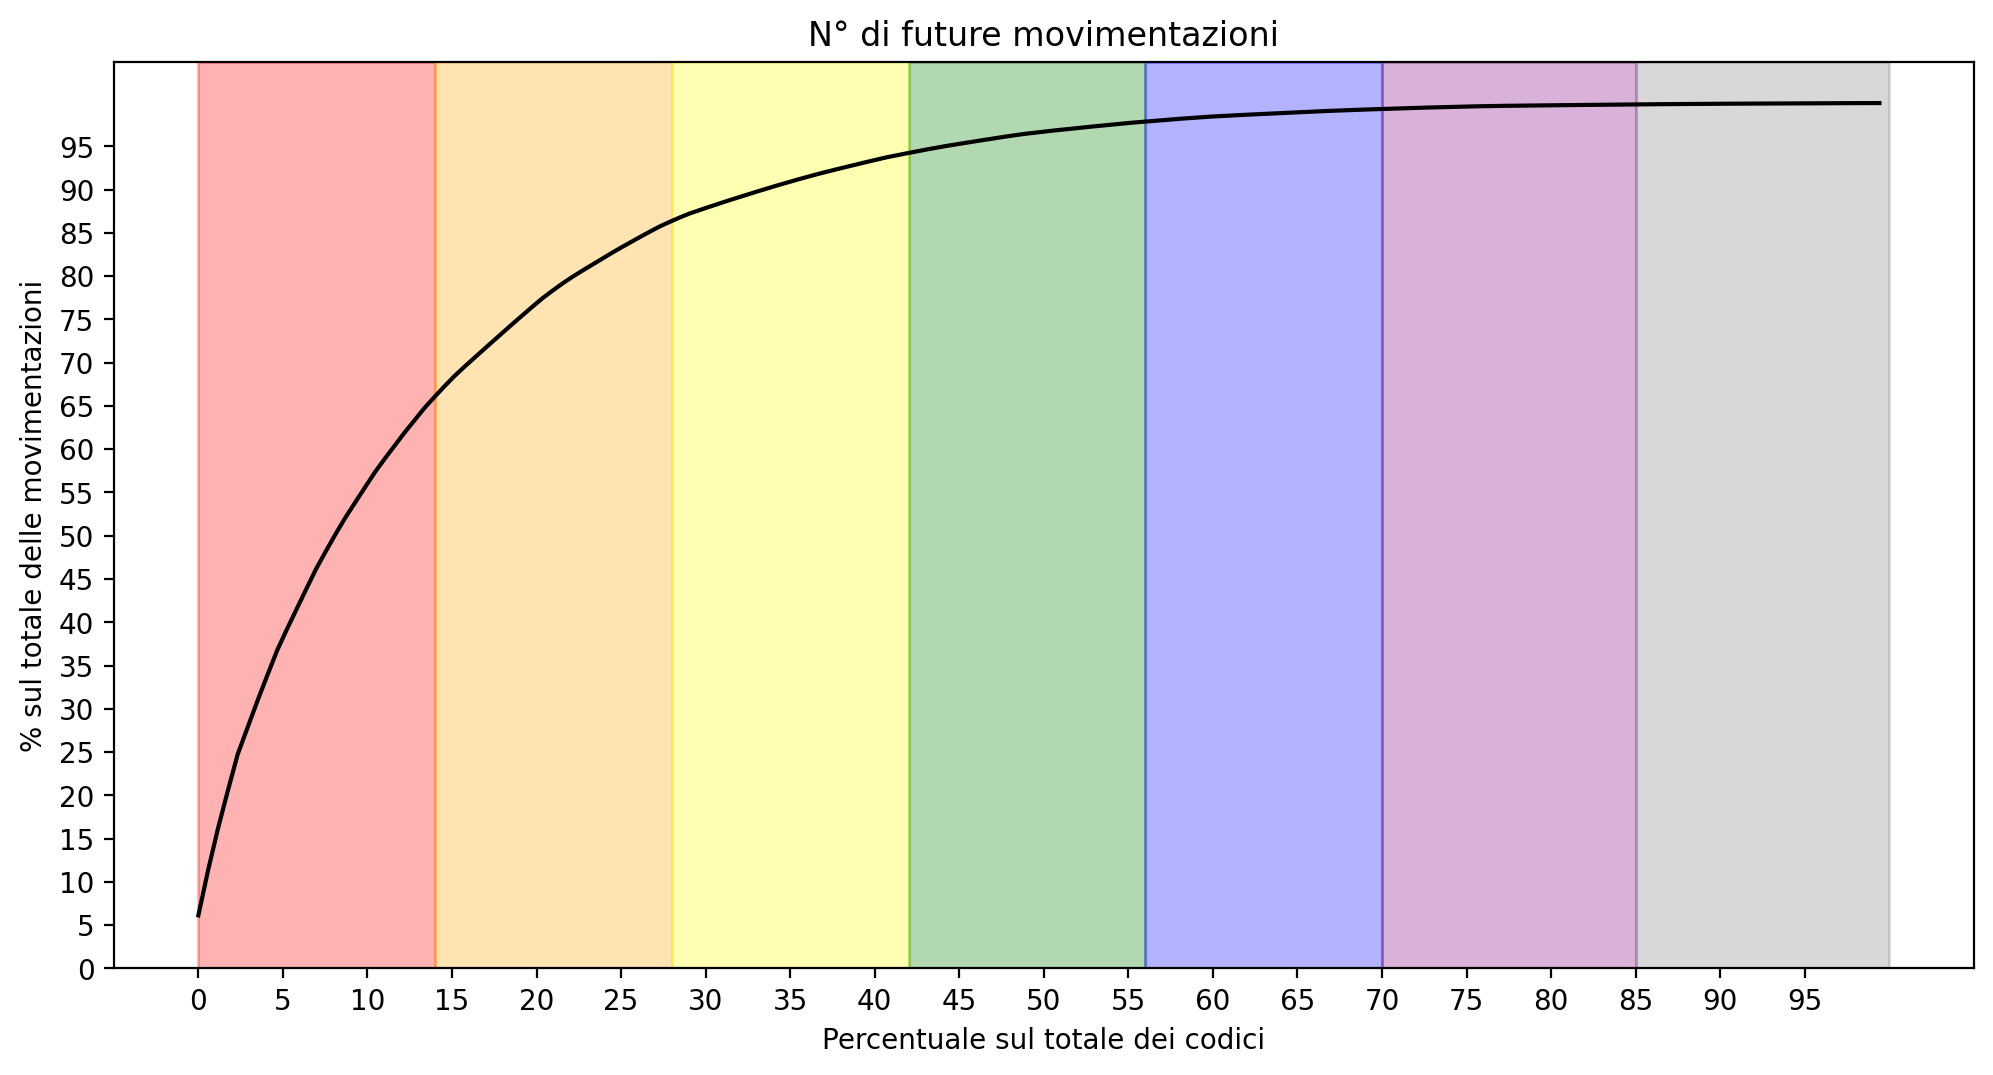

In [14]:
plotting(df_pareto, 'pareto', '% sul totale delle movimentazioni', 'N° di future movimentazioni')
plt.savefig('pareto.png')

In [15]:
df_pareto['posizione'] = 0
cassoni_sezione = 30
for x in df_pareto.index:
    if x <= cassoni_sezione:
        df_pareto.loc[x, 'posizione'] = 1
    elif x <= cassoni_sezione * 2:
        df_pareto.loc[x, 'posizione'] = 2
    elif x <= cassoni_sezione * 3:
        df_pareto.loc[x, 'posizione'] = 3
    elif x <= cassoni_sezione * 4:
        df_pareto.loc[x, 'posizione'] = 4
    elif x <= cassoni_sezione * 5:
        df_pareto.loc[x, 'posizione'] = 5
    elif x <= cassoni_sezione * 6:
        df_pareto.loc[x, 'posizione'] = 6
    else:
        df_pareto.loc[x, 'posizione'] = 7

In [16]:
df_pareto.to_csv('C:/Users/HP/Desktop/df_pareto_OP.csv')

In [17]:
df_pareto[df_pareto['posizione'] == 6]

,codice,movimentazioni,pareto,posizione
151,ROSA9,3,99.892778,6
152,GIALLO32,3,99.902239,6
153,ROSSO62,2,99.908546,6
154,ARGENTOPL5,2,99.914853,6
155,ADD32,2,99.921161,6
156,PREMIX37,2,99.927468,6
157,FILLER12,2,99.933775,6
158,GIALLO63,2,99.940082,6
159,ROSSO21,2,99.946389,6
160,ROSSO3A,2,99.952696,6
